## Научная графика в python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Глава 8 Координатные оси Axis

Данные, насённые тем или иным графическим способомна рисунок Figure и область рисования Axes, не представляют особого интереса для научного анализа, пока они не привязаны к какой-либо системе координат. При создании экземпляра axes на вновь созданной области рисования автоматически задаётся прямоугольная система координат, если не указаны атрибуты polar или projection. Подробнее про области рисования с другими системами координат смотри главу "Графики в полярных координатах".

Система координат определяет вид координатных осей. По умолчанию задаётся прямоугольная система координат: ось абсцисс (ось "OX") и ось ординат (ось "OY"). В полярной системе координат координатными осями являются радиус и угол наклона, что выражается в виде своеобразного тригонометрического круга.

Для хранения и форматирования каждой координатной оси и существует контейнер Axis.

### Электронные ресурсы:

+ [Описание элементов рисунка в matplotlib](http://matplotlib.org/users/artists.html);

In [1]:
# Преамбула

%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

def save(name='', fmt='png'):
    pwd = os.getcwd()
    os.chdir('./pictures/%s' % fmt)
    plt.savefig('%s.%s' % (name, fmt), fmt='png')
    os.chdir(pwd)

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

('Major X-ticks locations:', array([   0.,   20.,   40.,   60.,   80.,  100.]))
('Major X-ticks labels:', <a list of 6 Text major ticklabel objects>)
('Major X-ticks tick lines:', <a list of 12 Line2D ticklines objects>)


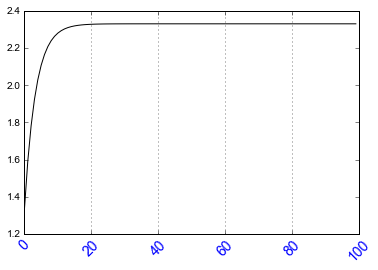

In [2]:
# Пример 8.1.1

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot(111)

x = np.arange(100)
y = -np.exp(-0.3*x) + 2.33

ax.plot(x, y, 'k')

xax = ax.xaxis   # или xax = ax.get_xaxis()

xlocs = xax.get_ticklocs()
print ('Major X-ticks locations:', xlocs)
xlabels = xax.get_ticklabels()
print ('Major X-ticks labels:', xlabels)
xlines = xax.get_ticklines()
print ('Major X-ticks tick lines:', xlines)

# Линии вспомогательной сетки (главные деления) только по оси абсцисс
xax.grid(True)

for label in xlabels:
    # цвет подписи деленений оси OX
    label.set_color('blue')
    # поворот подписей деленений оси OX 
    label.set_rotation(45)
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(14)

save('pic_8_1_1', fmt='png')
save('pic_8_1_1', fmt='pdf')
    
plt.show()

('Major X-ticks tick lines:', <a list of 12 Line2D ticklines objects>)
('Major X-ticks location:', array([   0.,   20.,   40.,   60.,   80.,  100.]))
('Major X-ticks labels:', <a list of 6 Text major ticklabel objects>)
('Major X-ticks tick lines:', <a list of 0 Line2D ticklines objects>)
('Minor X-ticks location:', [])
('Minor X-ticks labels:', <a list of 0 Text minor ticklabel objects>)
----------------------------
Тип изменения оси: linear
Область изменения отображения данных: [   0.  100.]
Область изменения отображения данных: [  0.  99.]
Линии сетки: <a list of 6 Line2D gridline objects>
Подпись оси: Text(0.5,0,u'')
Подписи делений: <a list of 6 Text major ticklabel objects>
Линии делений: <a list of 12 Line2D ticklines objects>
Расположение делений: [   0.   20.   40.   60.   80.  100.]
locator главных делений: <matplotlib.ticker.AutoLocator object at 0x000000000A674128>
formatter главных делений: <matplotlib.ticker.ScalarFormatter object at 0x000000000A76F668>
Список главных дел

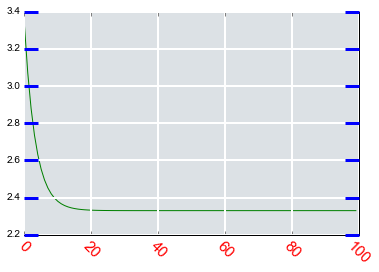

In [3]:
# Пример 8.2

fig = plt.figure()

ax = fig.add_subplot(111)
rect = ax.patch
rect.set_facecolor('lightslategray')
rect.set_alpha(0.25)

x = np.arange(100)
y = np.exp(-0.3*x) + 2.33

ax.plot(x, y, 'green')

xax = ax.xaxis   # экземпляр xaxis

print ('Major X-ticks tick lines:', xax.get_ticklines())
print ('Major X-ticks location:', xax.get_ticklocs())
print ('Major X-ticks labels:', xax.get_ticklabels())

print ('Major X-ticks tick lines:', xax.get_ticklines(minor=True))
print ('Minor X-ticks location:', xax.get_ticklocs(minor=True))
print ('Minor X-ticks labels:', xax.get_ticklabels(minor=True))

# вспомогательная сетка для главных делений 
ax.grid(True, which=u'major', color='w', linewidth=2., linestyle='solid')

# вспомогательная сетка для вспомогательных делений 
ax.grid(True, which=u'minor', color='b')

# Ось абсцисс
for label in ax.xaxis.get_ticklabels():
    # label - это экземпляр текста Text
    label.set_color('red')
    label.set_rotation(-45)
    label.set_fontsize(15)

# Ось ориднат
for line in ax.yaxis.get_ticklines():
    # line - это экземпляр плоской линии Line2D
    line.set_color('blue')   # задаём цвет линии деления
    line.set_markersize(14)   # задаём длину линии деления
    line.set_markeredgewidth(3)   # задаём толщину линии деления

print ('----------------------------')
print u'Тип изменения оси:', xax.get_scale()
print u'Область изменения отображения данных:', xax.get_view_interval()
print u'Область изменения отображения данных:', xax.get_data_interval()
print u'Линии сетки:', xax.get_gridlines()
print u'Подпись оси:', xax.get_label()
print u'Подписи делений:', xax.get_ticklabels()
print u'Линии делений:', xax.get_ticklines()
print u'Расположение делений:', xax.get_ticklocs()
print u'locator главных делений:', xax.get_major_locator()
print u'formatter главных делений:', xax.get_major_formatter()
print u'Список главных делений оси:', xax.get_major_ticks()
print u'locator вспомогательных делений:', xax.get_minor_locator()
print u'formatter вспомогательных делений:', xax.get_minor_formatter()
print u'Список вспомогательных делений оси:', xax.get_minor_ticks()
print ('----------------------------')

save('pic_8_2', fmt='png')
save('pic_8_2', fmt='pdf')

plt.show()

('Xticks:', array([-6., -4., -2.,  0.,  2.,  4.,  6.]))
('Yticks:', array([ 2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ]))
Yticklabels: <class 'matplotlib.cbook.silent_list'>
Каждый label - это <class 'matplotlib.text.Text'>


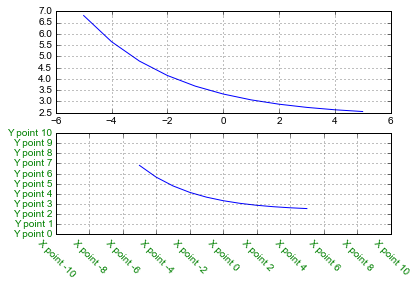

In [4]:
# Пример 8.3.1

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 6)
y = np.exp(-0.3*x) + 2.33

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, y)
ax1.grid(True)

ax2 = fig.add_subplot(212)
ax2.plot(x, y)
ax2.grid(True)

xticks = ax2.get_xticks()
yticks = ax2.get_yticks()

xx = np.arange(-10, 11, 2)
yy = np.arange(0, 11)

print('Xticks:', xticks)
print('Yticks:', yticks)

xlabels = []
ylabels = []
for i in xx:
    xlabels.append('X point %d' % i)

for j in yy:
    ylabels.append('Y point %d' % j)
    
ax2.set_xticks(xx)
ax2.set_yticks(yy)
ax2.set_yticklabels(ylabels, color='green')
ax2.set_xticklabels(xlabels, color='green', rotation=315)

yticklabels = ax2.get_yticklabels()
print('Yticklabels: %s' % type(yticklabels))
print('Каждый label - это %s' % (type(yticklabels[0])))

save('pic_8_3_1', fmt='png')
save('pic_8_3_1', fmt='pdf')

plt.show()

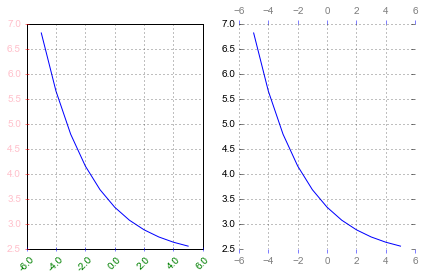

In [5]:
# Пример 8.3.2

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 6)
y = np.exp(-0.3*x) + 2.33

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(x, y)
ax1.grid(True)

# Настройка оси главных делений для оси абсцисс 
ax1.tick_params(axis='x', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='b', labelcolor='g',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)
# Настройка оси главных делений для оси ординат 
ax1.tick_params(axis='y', which='major', direction='inout',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='pink',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)

# Метод tick_params не имеет параметра rotation. Поэтому чтобы повернуть подписи
# нужно сделать это явно через метод set_xticklabels
xticks = ax1.get_xticks()
ax1.set_xticklabels(xticks, rotation=45)

ax2 = fig.add_subplot(122, frameon=False)
ax2.plot(x, y)
ax2.grid(True)

ax2.tick_params(axis='x', which='major', direction='out',
                bottom=True, top=True, left=True, right=True, 
                color='blue', labelcolor='grey',
                labelbottom=True, labeltop=True, labelleft=True, labelright=True)
ax2.tick_params(axis='x', which='minor', direction='both',
                bottom=True, top=False, left=True, right=False, 
                color='r', labelcolor='pink',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False)

plt.tight_layout()

save('pic_8_3_2', fmt='png')
save('pic_8_3_2', fmt='pdf')

plt.show()

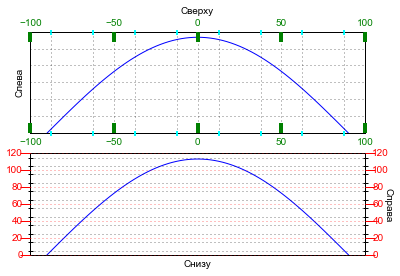

In [6]:
# Пример 8.3.3

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-90, 92.5 , 2.5)
y = 113.3*np.cos(x*np.pi/180.)
z = 113.3*np.sin(x*np.pi/180.)

fig = plt.figure()

ax = fig.add_subplot(211)
ax.plot(x, y)

ax.tick_params(axis='x', which='major', 
               labelleft='off', labelright='off', labeltop='on', labelbottom='on', 
               bottom=True, top=True,
               direction='in', length=10, width=4, colors='g')

old_major = ax.get_xticks()
N = 0.25
lag = (old_major[1] - old_major[0])*N
new_minor = np.arange(old_major[0] + lag, old_major[-1], 2*lag)
ax.set_xticks(new_minor, minor = True)

ax.tick_params(axis='x', which='minor', 
               labeltop='on', labelbottom='on', 
               bottom=True, top=True,
               direction='inout', length=5, width=2, colors='cyan')

ax.tick_params(axis='y', 
               labelleft='off', labelright='off',
               left=False, right=False)

ax.grid(True, which='major')
ax.grid(True, which='minor')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'Слева')
ax.xaxis.set_label_position('top')
ax.set_xlabel(u'Сверху')

# ************************************************
ax = fig.add_subplot(212)

ax.plot(x, y)
ax.tick_params(axis='both', reset=True)

ax.tick_params(axis='y', which='major', 
               labelleft='on', labelright='on', 
               left=True, right=True,
               direction='out', length=10, width=1., colors='r')

old_major = ax.get_yticks()
N = 0.25
lag = (old_major[1] - old_major[0])*N
new_minor = np.arange(old_major[0] + lag, old_major[-1], 2*lag)
ax.set_yticks(new_minor, minor = True)

ax.tick_params(axis='y', which='minor', 
               labelleft='on', labelright='on', 
               left=True, right=True,
               direction='inout', length=5, width=1., colors='k')

ax.tick_params(axis='x',
               labeltop='off', labelbottom='off', 
               bottom=False, top=False)

ax.yaxis.set_label_position('right')
ax.set_ylabel(u'Справа', rotation=270)

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'Снизу')

ax.grid(True, axis='y', which='major', color='red')
ax.grid(True, axis='y', which='minor', color='k')

save('pic_8_3_3', fmt='png')
save('pic_8_3_3', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

#### Научная графика в python. Глава 8 Координатные оси Axis